Survival Prediction using Titanic Dataset

**Data Exploration**

Loading the Dataset

In [558]:
import numpy as np
import pandas as pd

df = pd.read_csv("titanic.csv")

Shape of the dataset

In [559]:
rows,cols=df.shape
print("Number of rows:",rows)
print("number of columns:",cols)

Number of rows: 891
number of columns: 12


Printing The Dataset for Sample

In [560]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Analysing Numerical and Categorical Columns

In [561]:
numerical = df.select_dtypes(include=[np.number]).columns
print("numerical: ",numerical)
categorical = df.select_dtypes(exclude=[np.number]).columns
print("categorical: ",categorical)

numerical:  Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
categorical:  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


Finding Missing Values

In [562]:
#missing values
print("missing values:",df.isnull().sum())

missing values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*Analysing Correlation to decide whether to impute or drop the column with missing values*

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


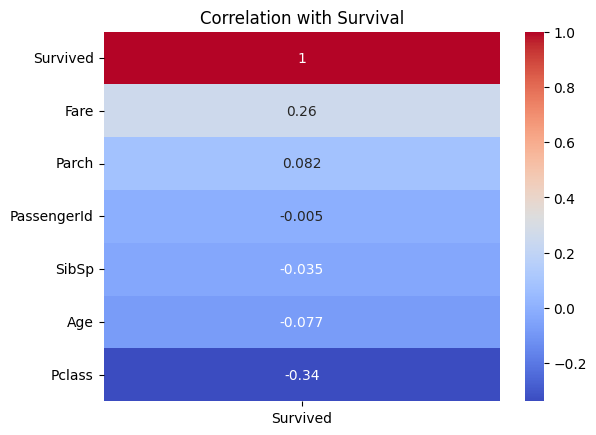

In [563]:
import seaborn as sns
import matplotlib.pyplot as plt


# Encode 'Survived' as it's already numerical (0 = No, 1 = Yes)
correlation = df.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation[['Survived']].sort_values(by='Survived', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Survival")
plt.show()

<ipython-input-564-6dbbdeb5ebf1>:15: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


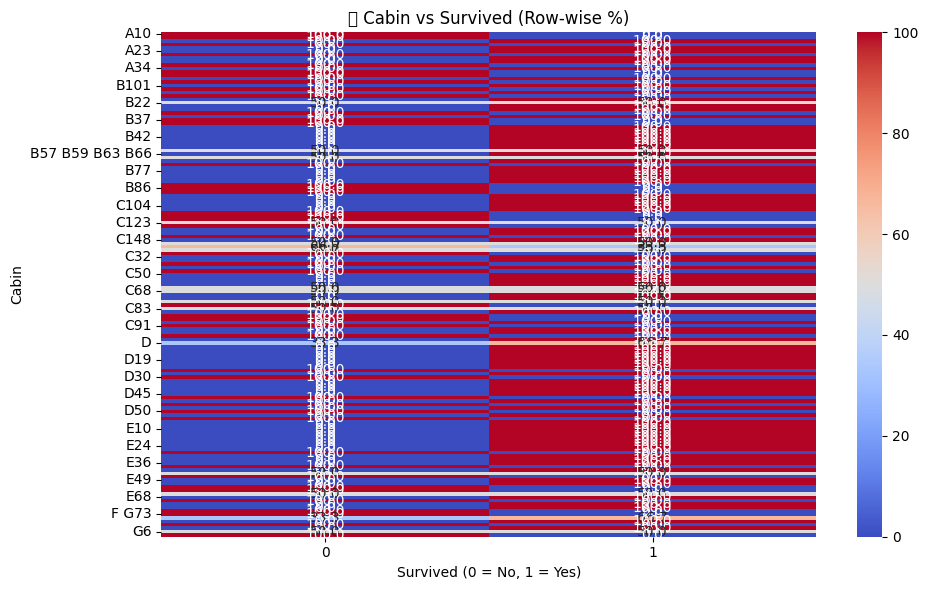

<ipython-input-564-6dbbdeb5ebf1>:24: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


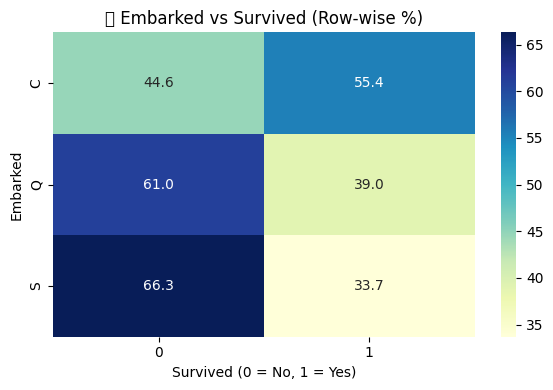

<ipython-input-564-6dbbdeb5ebf1>:34: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


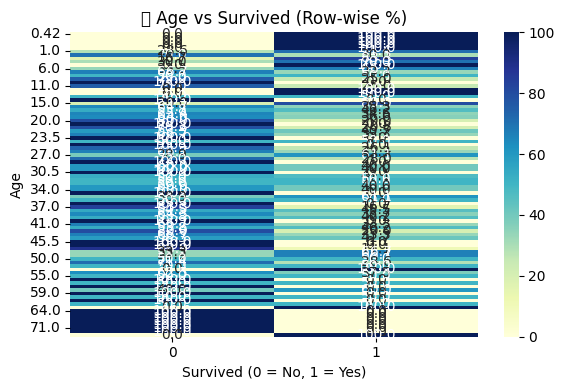

In [564]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute normalized cross tabulations
cabin_survival = pd.crosstab(df['Cabin'], df['Survived'], normalize='index') * 100
embarked_survival = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100
age_survival = pd.crosstab(df['Age'], df['Survived'], normalize='index') * 100

# 📌 Heatmap for Cabin vs Survived
plt.figure(figsize=(10, 6))
sns.heatmap(cabin_survival, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('🔥 Cabin vs Survived (Row-wise %)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Cabin')
plt.tight_layout()
plt.show()

# 📌 Heatmap for Embarked vs Survived
plt.figure(figsize=(6, 4))
sns.heatmap(embarked_survival, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('🚢 Embarked vs Survived (Row-wise %)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Embarked')
plt.tight_layout()
plt.show()


# 📌 Heatmap for Embarked vs Survived
plt.figure(figsize=(6, 4))
sns.heatmap(age_survival, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('🚢 Age vs Survived (Row-wise %)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


Analysis through survival rate

In [565]:
print(df.groupby('Survived')['Age'].describe())




print(df.groupby('Survived')['Cabin'].describe())
print(df.groupby('Survived')['Embarked'].describe())



          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
         count unique          top freq
Survived                               
0           68     62  C23 C25 C27    2
1          136    101      B96 B98    4
         count unique top freq
Survived                      
0          549      3   S  427
1          340      3   S  217


Cross - Tabulation : *To identify Relationship*

In [566]:
import pandas as pd


age_survived_ct = pd.crosstab(df['Age'], df['Survived'])
print("📊 Age vs Survived:\n", age_survived_ct)

# Cross-tabulation between Cabin and Survived
cabin_survived_ct = pd.crosstab(df['Cabin'], df['Survived'])
print("📊 Cabin vs Survived:\n", cabin_survived_ct)

# Cross-tabulation between Embarked and Survived
embarked_survived_ct = pd.crosstab(df['Embarked'], df['Survived'])
print("\n📊 Embarked vs Survived:\n", embarked_survived_ct)


📊 Age vs Survived:
 Survived  0  1
Age           
0.42      0  1
0.67      0  1
0.75      0  2
0.83      0  2
0.92      0  1
...      .. ..
70.00     2  0
70.50     1  0
71.00     2  0
74.00     1  0
80.00     0  1

[88 rows x 2 columns]
📊 Cabin vs Survived:
 Survived  0  1
Cabin         
A10       1  0
A14       1  0
A16       0  1
A19       1  0
A20       0  1
...      .. ..
F33       0  3
F38       1  0
F4        0  2
G6        2  2
T         1  0

[147 rows x 2 columns]

📊 Embarked vs Survived:
 Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


Inferences:

**Age:** *Slightly Important*

---


**Cabin**:*Moderately Important*

---


**Embarked**:*Slight to Moderate Important*

---



Imputation of Age Column through Regression

In [567]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder



# Encode categorical variables for regression
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male=1, Female=0
df['Embarked'] = df['Embarked'].fillna('S')  # Fill Embarked NaNs first
df['Embarked'] = le.fit_transform(df['Embarked'])

# Drop 'Cabin' for now due to many missing values
# You can try encoding it later

# Features to use for age prediction
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Split into known and missing Age
known_age = df[df['Age'].notnull()]
unknown_age = df[df['Age'].isnull()]

# Train regression model
X_train = known_age[features]
y_train = known_age['Age']

reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict missing Age values
predicted_ages = reg.predict(unknown_age[features])

# Fill missing Age in original dataset
df.loc[df['Age'].isnull(), 'Age'] = predicted_ages

print("Missing Age values after imputation:", df['Age'].isnull().sum())

Missing Age values after imputation: 0


Imputation of Embarked Column through Mode

In [568]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Embarked']= le.fit_transform(df['Embarked'])

e=df['Embarked'].mode()[0]

e_mode=le.inverse_transform([e])[0]
print(e_mode)
df['Embarked'] = df['Embarked'].fillna(e_mode)

2


Analysing the way to impute Cabin column

In [569]:
unique_cabins = df['Cabin'].unique()
print(unique_cabins)


[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


Imputation of Cabin Column

In [570]:
df['Cabin'] = df['Cabin'].fillna("Unknown")

Analysing missing values after Data Cleaning

In [571]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Univariate Analysis

In [572]:
print(df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.210515   
std     257.353842    0.486592    0.836071    0.477990   13.681229   
min       1.000000    0.000000    1.000000    0.000000   -7.859596   
25%     223.500000    0.000000    2.000000    0.000000   21.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   36.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    1.536476  
std      1.102743    0.806057   49.693429    0.791503  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    1.000000  
50%      0.000000    0.000000   1

*** Identifying Unique Values in Each Column***

In [573]:
# Iterate through each column to get unique values and their frequencies
for column in df.columns:
    print(f"Column: {column}")
    print(f"Unique values: {df[column].unique()}")
    print(f"Value counts:\n{df[column].value_counts()}\n")


Column: PassengerId
Unique values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238

Encoding and Scaling

In [574]:
df['Ticket']= le.fit_transform(df['Ticket'])
df['Sex']= le.fit_transform(df['Sex'])

In [575]:
# Define numerical and categorical columns
numerical_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
x = df.drop("Survived", axis=1)
y = df['Survived']

# Scale numerical features only
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

**Identifying Outliers through Skewness and Kurtosis**

In [576]:
import pandas as pd
from scipy.stats import skew, kurtosis



# Separate numerical columns
numerical = df.select_dtypes(include=[np.number]).columns

# Calculate skewness and kurtosis for all numerical columns
skewness = df[numerical].apply(skew)
kurt = df[numerical].apply(kurtosis)

# Display skewness and kurtosis values
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)

# Define thresholds for outliers (you can adjust these thresholds based on your analysis)
outlier_threshold_skew = 1  # Absolute value > 1 considered skewed
outlier_threshold_kurt = 3  # Absolute value > 3 considered to have heavy tails

# Detect outliers based on skewness and kurtosis
skew_outliers = skewness[abs(skewness) > outlier_threshold_skew]
kurt_outliers = kurt[abs(kurt) > outlier_threshold_kurt]

print("\nOutliers based on skewness (|skew| > 1):")
print(skew_outliers)

print("\nOutliers based on kurtosis (|kurt| > 3):")
print(kurt_outliers)


Skewness:
 PassengerId    0.000000
Survived       0.477717
Pclass        -0.629486
Name           0.000000
Sex           -0.617878
Age            0.338834
SibSp          3.689128
Parch          2.744487
Ticket        -0.061001
Fare           4.779253
Cabin         -2.163663
Embarked      -1.262693
dtype: float64

Kurtosis:
 PassengerId    -1.200003
Survived       -1.771786
Pclass         -1.279570
Name           -1.200003
Sex            -1.618226
Age             0.668143
SibSp          17.773512
Parch           9.716613
Ticket         -1.230521
Fare           33.204289
Cabin           3.389529
Embarked       -0.212763
dtype: float64

Outliers based on skewness (|skew| > 1):
SibSp       3.689128
Parch       2.744487
Fare        4.779253
Cabin      -2.163663
Embarked   -1.262693
dtype: float64

Outliers based on kurtosis (|kurt| > 3):
SibSp    17.773512
Parch     9.716613
Fare     33.204289
Cabin     3.389529
dtype: float64


*Analysing Outliers through Visualisation*

<ipython-input-577-93a4a3143b2a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'] ,color='skyblue')


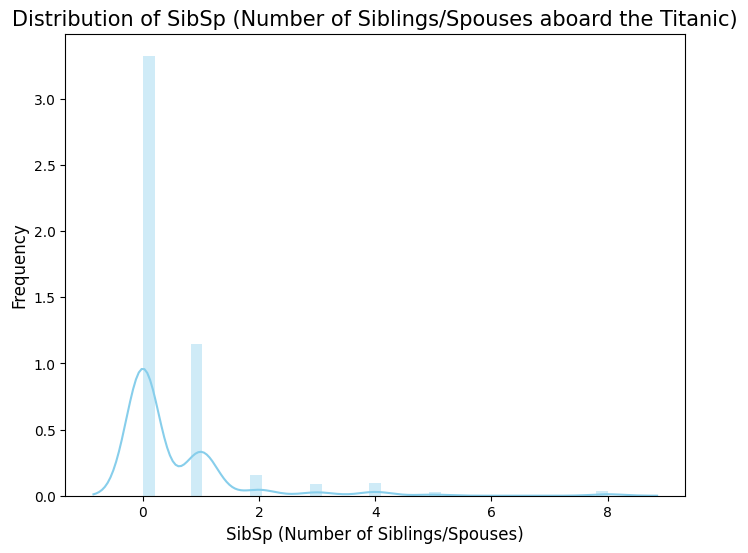

In [577]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram for 'SibSp'
plt.figure(figsize=(8, 6))
sns.distplot(df['SibSp'] ,color='skyblue')
plt.title('Distribution of SibSp (Number of Siblings/Spouses aboard the Titanic)', fontsize=15)
plt.xlabel('SibSp (Number of Siblings/Spouses)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**SibSP:Positively Skewed - Tail larger on Right Side & LaptoKurtic**

<ipython-input-578-f531f4859693>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Parch'], color='lightgreen')


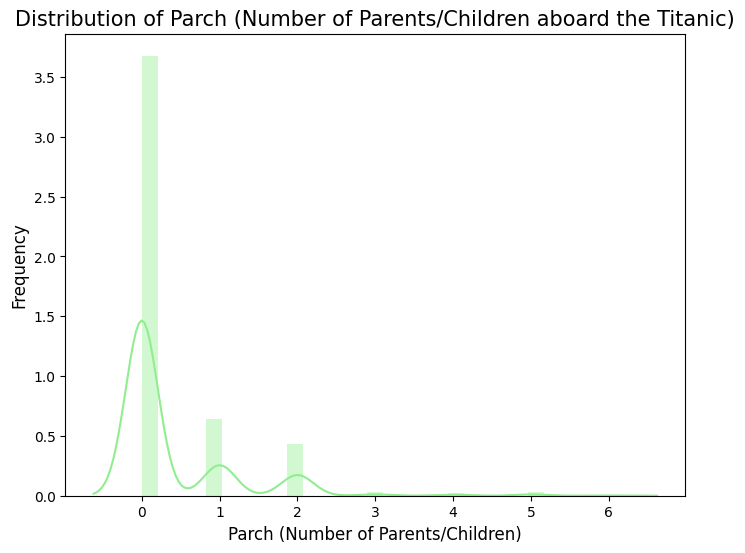

In [578]:
# Plotting the histogram for 'Parch'
plt.figure(figsize=(8, 6))
sns.distplot(df['Parch'], color='lightgreen')
plt.title('Distribution of Parch (Number of Parents/Children aboard the Titanic)', fontsize=15)
plt.xlabel('Parch (Number of Parents/Children)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Parch: Positively Skewed - Tail larger on Right Side & LaptoKurtic**

<ipython-input-579-5e26b37ad33c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'], color='purple')


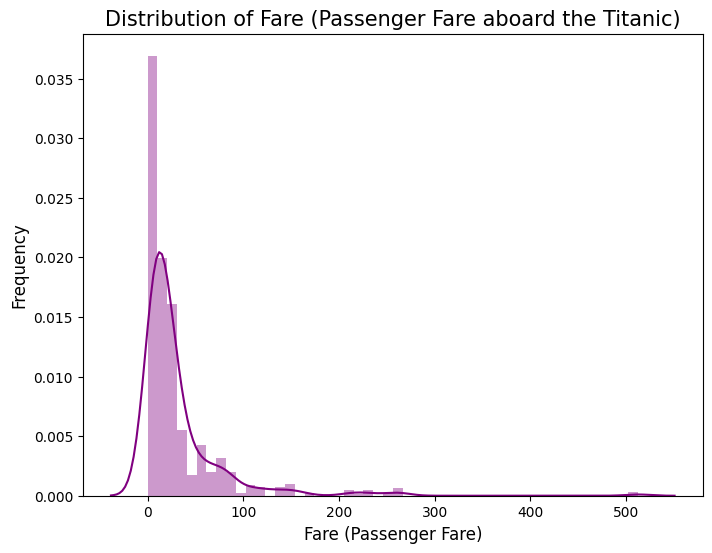

In [579]:
# Plotting the histogram for 'Fare'
plt.figure(figsize=(8, 6))
sns.distplot(df['Fare'], color='purple')
plt.title('Distribution of Fare (Passenger Fare aboard the Titanic)', fontsize=15)
plt.xlabel('Fare (Passenger Fare)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Fare: Positively Skewed - Tail larger on Right Side & LaptoKurtic**

<ipython-input-580-fc48cc57777b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cabin'], color='cyan')


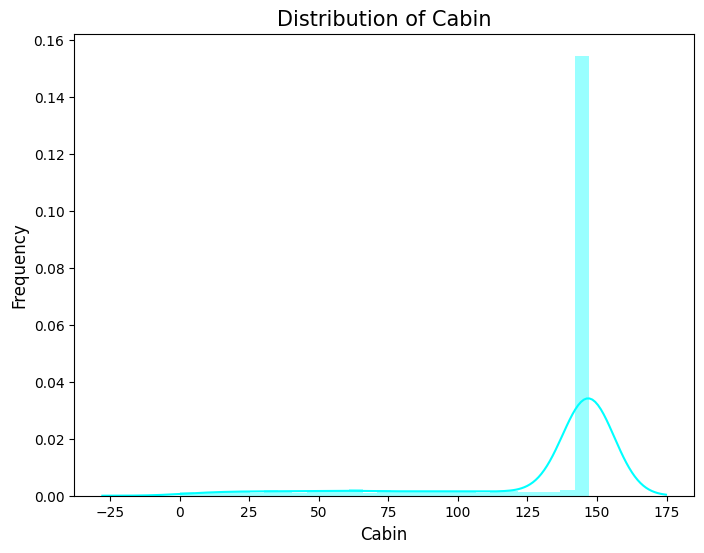

In [580]:
# Plotting the histogram for 'Fare'
plt.figure(figsize=(8, 6))
sns.distplot(df['Cabin'], color='cyan')
plt.title('Distribution of Cabin', fontsize=15)
plt.xlabel('Cabin', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Cabin: Negatively Skewed, Tail longer on left side & LaptoKurtic**

<ipython-input-581-c846cde797e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Embarked'], color='cyan')


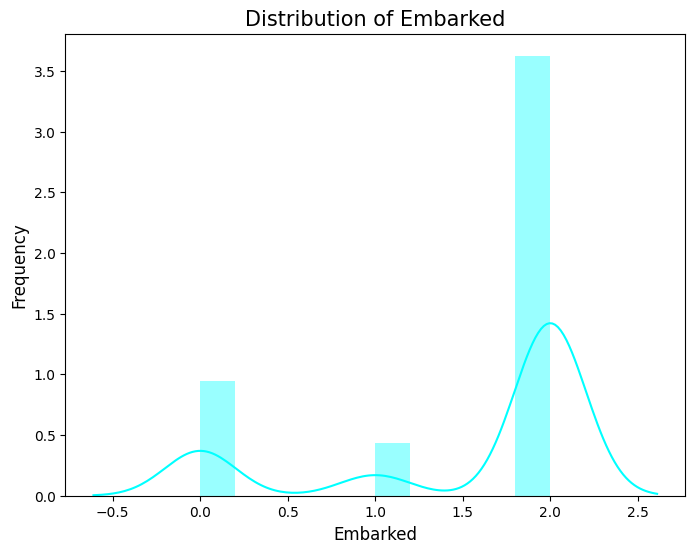

In [581]:
# Plotting the histogram for 'Fare'
plt.figure(figsize=(8, 6))
sns.distplot(df['Embarked'], color='cyan')
plt.title('Distribution of Embarked', fontsize=15)
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


**Embarked: Negatively Skewed, Tail longer on left side & LaptoKurtic**

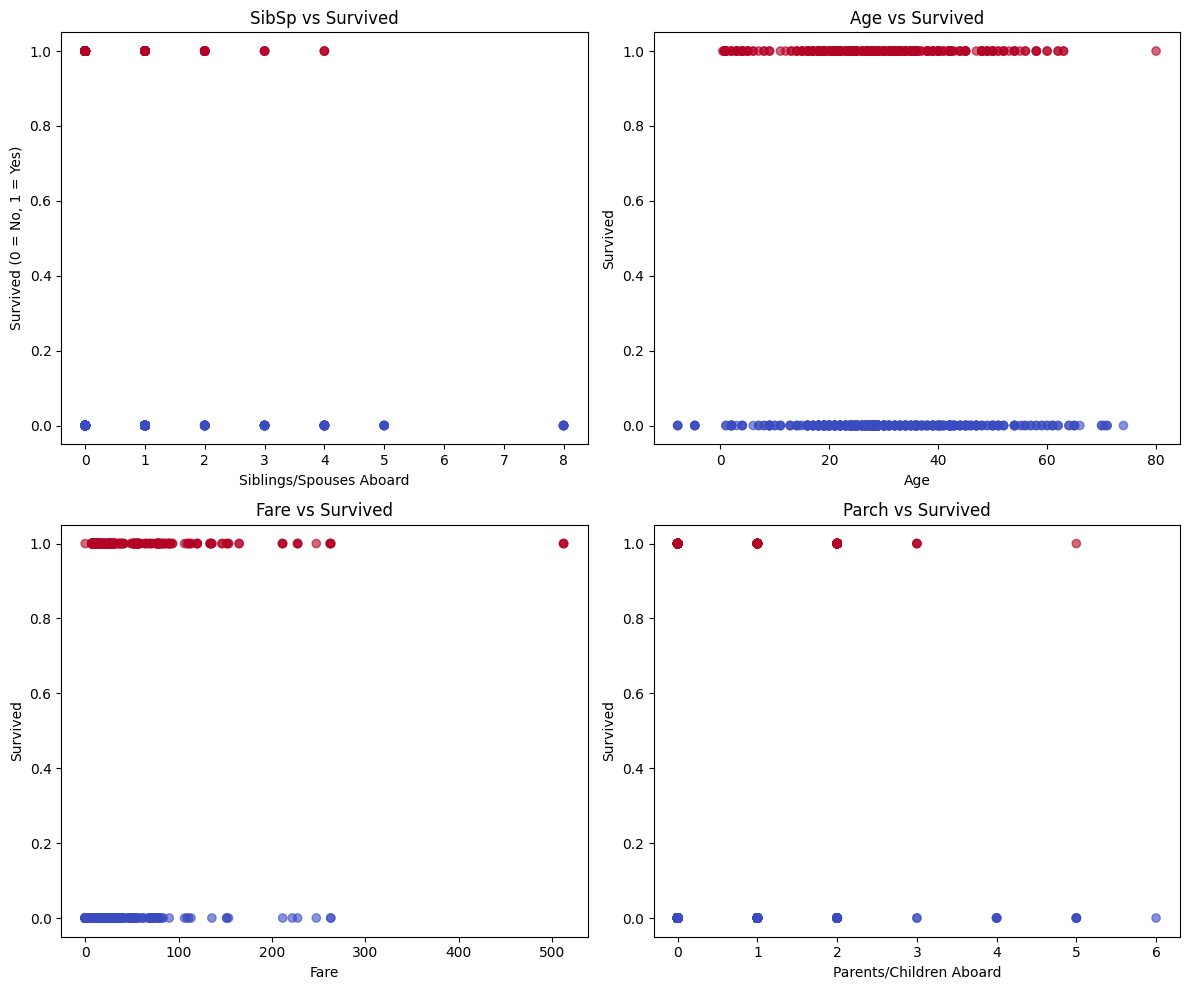

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Fill missing values for proper plotting


# Set up the figure
plt.figure(figsize=(12, 10))

# SibSp vs Survived
plt.subplot(2, 2, 1)
plt.scatter(df['SibSp'], df['Survived'], alpha=0.6, c=df['Survived'], cmap='coolwarm')
plt.title("SibSp vs Survived")
plt.xlabel("Siblings/Spouses Aboard")
plt.ylabel("Survived (0 = No, 1 = Yes)")

# Age vs Survived
plt.subplot(2, 2, 2)
plt.scatter(df['Age'], df['Survived'], alpha=0.6, c=df['Survived'], cmap='coolwarm')
plt.title("Age vs Survived")
plt.xlabel("Age")
plt.ylabel("Survived")

# Fare vs Survived
plt.subplot(2, 2, 3)
plt.scatter(df['Fare'], df['Survived'], alpha=0.6, c=df['Survived'], cmap='coolwarm')
plt.title("Fare vs Survived")
plt.xlabel("Fare")
plt.ylabel("Survived")

# Parch vs Survived
plt.subplot(2, 2, 4)
plt.scatter(df['Parch'], df['Survived'], alpha=0.6, c=df['Survived'], cmap='coolwarm')
plt.title("Parch vs Survived")
plt.xlabel("Parents/Children Aboard")
plt.ylabel("Survived")

plt.tight_layout()
plt.show()


*SibSp vs Survived:*
**Not linear.**

---




*Fare vs Survived:*
**Somewhat linear but skewed**

---


*Parch vs Survived:*
**Non-linear**

---

*Age vs Survived:*
**Weak or slightly non-linear**

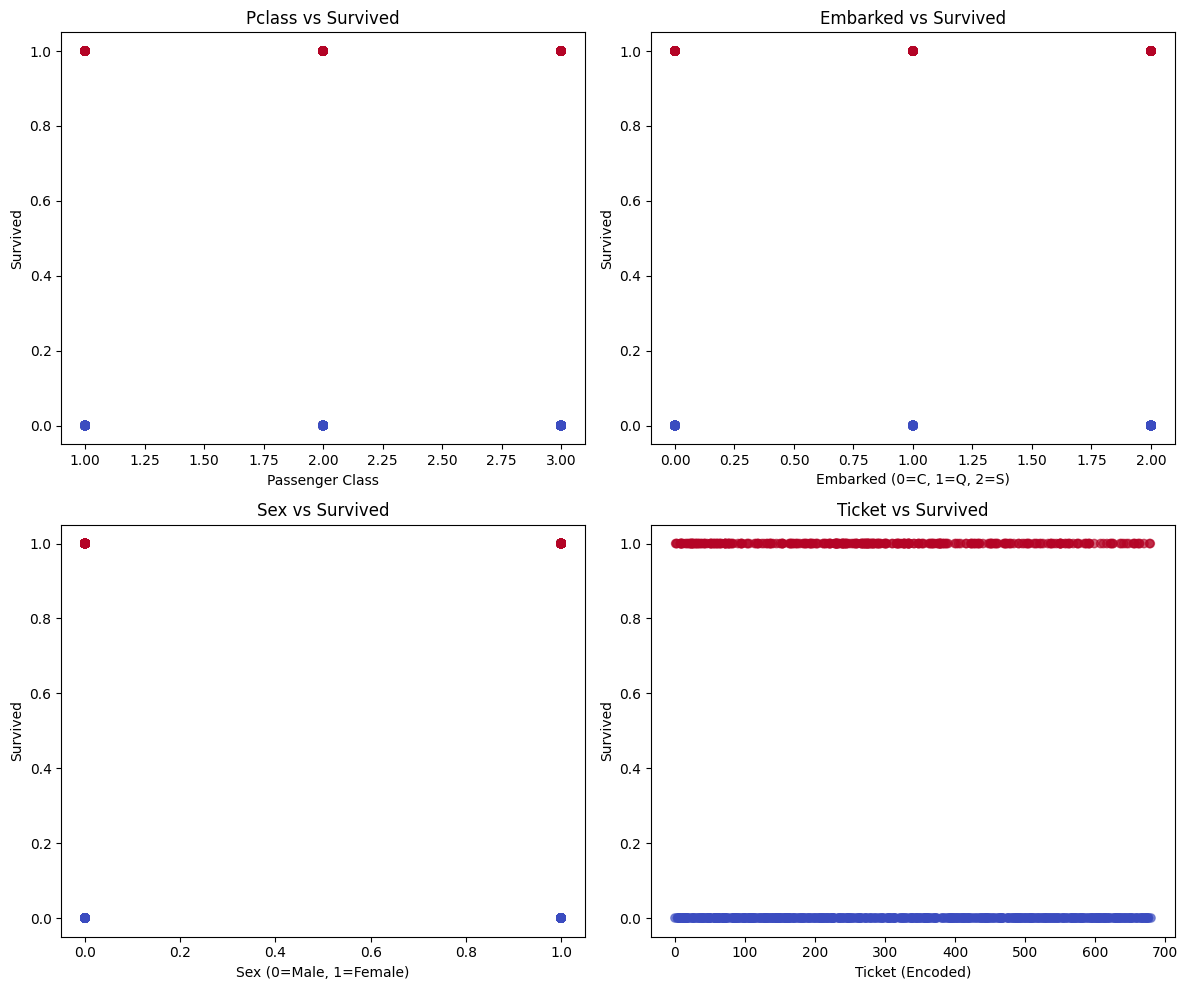

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna('S')  # Most common value
df['Sex'] = df['Sex'].fillna('male')         # Default if needed

# Convert categorical columns to numeric
df['Embarked_num'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Sex_num'] = df['Sex'].map({'male': 0, 'female': 1})
df['Ticket_num'] = pd.factorize(df['Ticket'])[0]  # Encode unique ticket strings as numbers

# Set up the figure
plt.figure(figsize=(12, 10))

# Pclass vs Survived
plt.subplot(2, 2, 1)
plt.scatter(df['Pclass'], df['Survived'], alpha=0.6, c=df['Survived'], cmap='coolwarm')
plt.title("Pclass vs Survived")
plt.xlabel("Passenger Class")
plt.ylabel("Survived")

# Embarked vs Survived
plt.subplot(2, 2, 2)
plt.scatter(df['Embarked'], df['Survived'], alpha=0.6, c=df['Survived'], cmap='coolwarm')
plt.title("Embarked vs Survived")
plt.xlabel("Embarked (0=C, 1=Q, 2=S)")
plt.ylabel("Survived")

# Sex vs Survived
plt.subplot(2, 2, 3)
plt.scatter(df['Sex'], df['Survived'], alpha=0.6, c=df['Survived'], cmap='coolwarm')
plt.title("Sex vs Survived")
plt.xlabel("Sex (0=Male, 1=Female)")
plt.ylabel("Survived")

# Ticket vs Survived
plt.subplot(2, 2, 4)
plt.scatter(df['Ticket_num'], df['Survived'], alpha=0.6, c=df['Survived'], cmap='coolwarm')
plt.title("Ticket vs Survived")
plt.xlabel("Ticket (Encoded)")
plt.ylabel("Survived")

plt.tight_layout()
plt.show()


*Pclass vs Survived*
**Not linear**

---


 *Embarked vs Survived*
**Not linear**

---


*Sex vs Survived*
**Binary but strong trend (linear)**

---


 *Ticket (Encoded) vs Survived*
**No linearity**

*Feature Importance Analysis through Logistic Regression* **Trained on Entire Dataset**


Performance Metrics on Test Set:
Accuracy Score: 0.8156
MSE: 0.1844
RMSE: 0.4294
R² Score: 0.2398

Confusion Matrix:
[[89 16]
 [17 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Logistic Regression Feature Importances (sorted):
Sex: 2.6390
Pclass: 0.8657
Age: 0.4798
SibSp: 0.3985
Embarked: 0.1792
Fare: 0.1214
Parch: 0.0770
PassengerId: 0.0703
Cabin: 0.0091
Ticket: 0.0014
Name: 0.0000


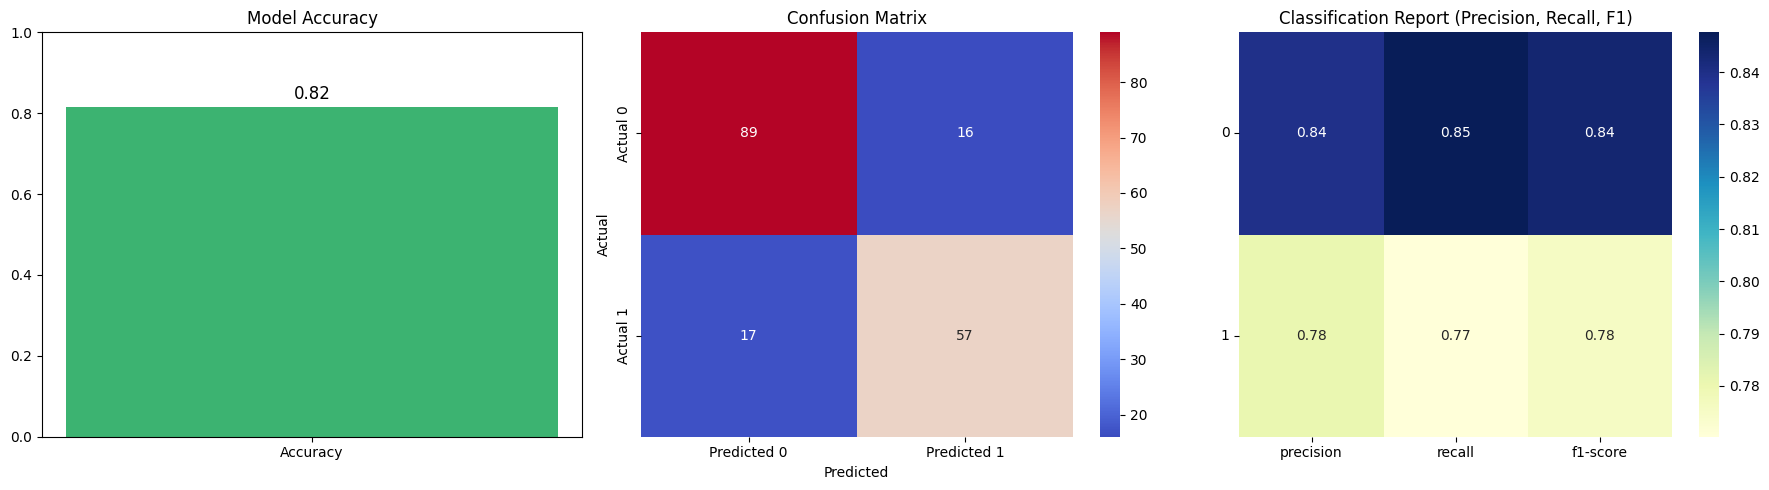

In [582]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, mean_squared_error, r2_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split

# --- Preprocessing ---

# Define numerical and categorical columns
numerical_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
x = df.drop("Survived", axis=1)
y = df['Survived']

# Scale numerical features only
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

# --- Train-Test Split ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# --- Model Training ---
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# --- Predictions ---
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# --- Print Metrics ---
print("\nPerformance Metrics on Test Set:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Feature Importance ---
print("\nLogistic Regression Feature Importances (sorted):")
coefficients = model.coef_[0]
feature_names = x.columns
feature_importance = sorted(zip(feature_names, np.abs(coefficients)), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

# --- Visualizations ---
plt.figure(figsize=(18, 5))

# 1. Accuracy Score
plt.subplot(1, 3, 1)
plt.bar(["Accuracy"], [accuracy], color='mediumseagreen')
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=12)

# 2. Confusion Matrix
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 3. Classification Report
plt.subplot(1, 3, 3)
cr_df = pd.DataFrame(class_report).transpose().iloc[:2, :-1]  # Only class 0 and 1 rows, drop support
sns.heatmap(cr_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report (Precision, Recall, F1)")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


**Logistic Regression after Dimensionality Reduction**

Number of Principal Components Retained: 10

🎯 Performance Metrics using PCA + Random Forest:
Accuracy Score: 0.7989
MSE: 0.2011
RMSE: 0.4485
R² Score: 0.1707

Confusion Matrix:
[[90 15]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



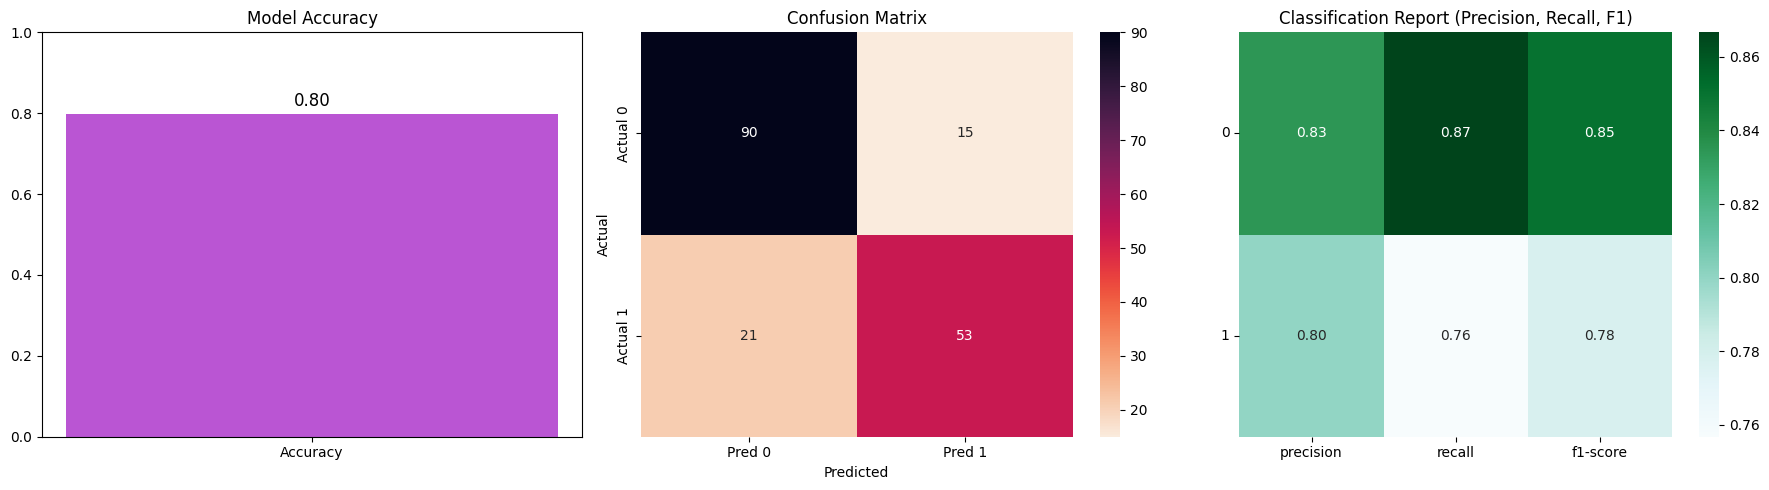

In [590]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


# Define numerical and categorical columns
numerical_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Example DataFrame (assuming df is already loaded)
# df = pd.read_csv('your_dataset.csv')

# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
x = df.drop("Survived", axis=1)
y = df['Survived']

# Scale numerical features before PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA (retain 95% of variance or set fixed components)
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_scaled)

print(f"Number of Principal Components Retained: {x_pca.shape[1]}")

# Train Random Forest Classifier
rf_model = LogisticRegression()
rf_model.fit(x_pca, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Train on training set
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Predictions
print("\n🎯 Performance Metrics using PCA + Random Forest:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# --- Visualizations ---
plt.figure(figsize=(18, 5))

# 1. Accuracy Score Bar Plot
plt.subplot(1, 3, 1)
plt.bar(["Accuracy"], [accuracy], color='mediumorchid')
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=12)

# 2. Confusion Matrix Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 3. Classification Report Heatmap
plt.subplot(1, 3, 3)
cr_df = pd.DataFrame(class_report_dict).transpose().iloc[:2, :-1]  # Only class 0 & 1 rows
sns.heatmap(cr_df, annot=True, cmap="BuGn", fmt=".2f")
plt.title("Classification Report (Precision, Recall, F1)")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


**Inference: Performance *Decreased *for Logistic Regression after dimensionality Reduction**

Training Logistic Regression Model for **Important Features** alone


Top 5 Important Features Used for Training: ['Sex', 'Pclass', 'Age', 'SibSp', 'Embarked']

Performance Metrics on Top Features (Test Set):
Accuracy Score: 0.8156
MSE: 0.1844
RMSE: 0.4294
R² Score: 0.2398
Confusion Matrix:
[[89 16]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Logistic Regression Feature Importances (Top Features Only):
Sex: 2.5424
Pclass: 0.8980
Age: 0.4520
SibSp: 0.3959
Embarked: 0.2286


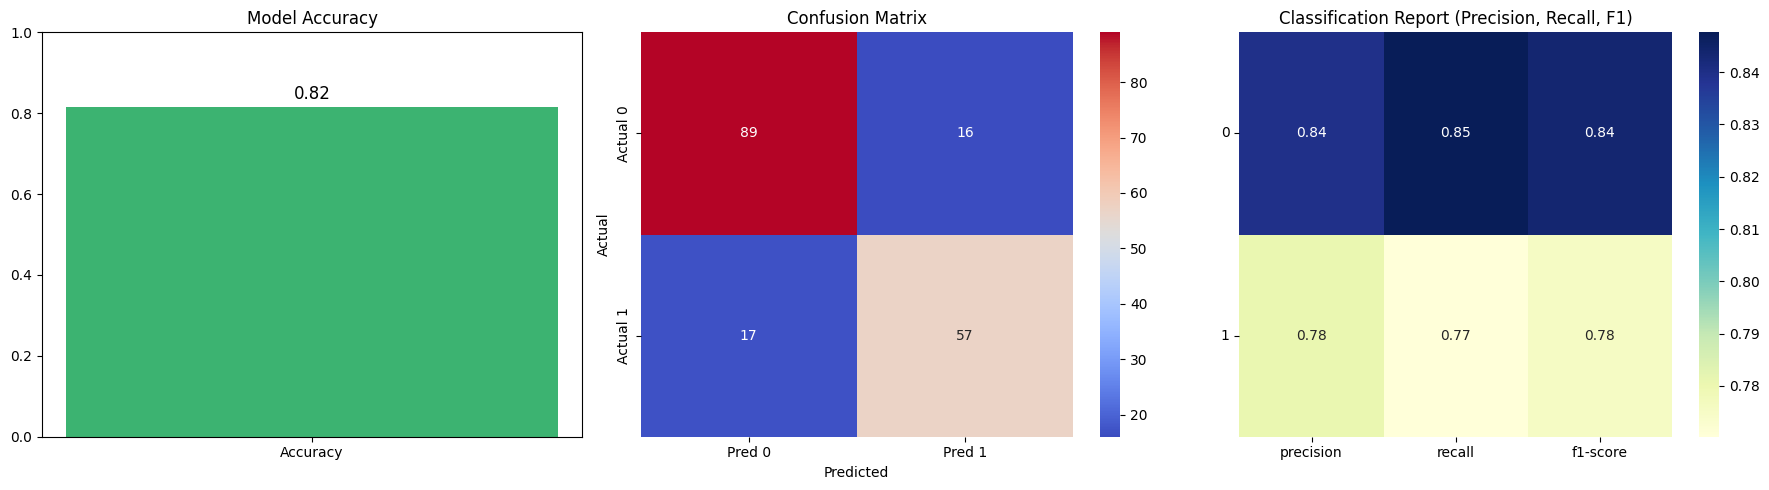

In [583]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, mean_squared_error, r2_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split

# --- Preprocessing ---

# Define numerical and categorical columns
numerical_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
x = df.drop("Survived", axis=1)
y = df['Survived']

# Scale numerical features
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

# --- Train initial model on full data to get feature importance ---
model_full = LogisticRegression(max_iter=1000)
model_full.fit(x, y)

coefficients = model_full.coef_[0]
feature_names = x.columns
feature_importance = sorted(zip(feature_names, np.abs(coefficients)), key=lambda x: x[1], reverse=True)

# Select top N important features
top_n = 5
top_features = [feature for feature, _ in feature_importance[:top_n]]
print(f"\nTop {top_n} Important Features Used for Training: {top_features}")

# Use only top N features
x_top = x[top_features]

# --- Train-Test Split ---
x_train, x_test, y_train, y_test = train_test_split(x_top, y, test_size=0.2, random_state=42)

# --- Train model on top features ---
model_top = LogisticRegression(max_iter=1000)
model_top.fit(x_train, y_train)

# --- Predict ---
y_pred = model_top.predict(x_test)
y_prob = model_top.predict_proba(x_test)[:, 1]

# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# --- Print Metrics ---
print("\nPerformance Metrics on Top Features (Test Set):")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Show Feature Importances (on reduced model) ---
print("\nLogistic Regression Feature Importances (Top Features Only):")
coefficients_top = model_top.coef_[0]
for feature, importance in zip(top_features, np.abs(coefficients_top)):
    print(f"{feature}: {importance:.4f}")

# --- Visualizations ---
plt.figure(figsize=(18, 5))

# 1. Accuracy Score Bar Plot
plt.subplot(1, 3, 1)
plt.bar(["Accuracy"], [accuracy], color='mediumseagreen')
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=12)

# 2. Confusion Matrix Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 3. Classification Report Heatmap
plt.subplot(1, 3, 3)
cr_df = pd.DataFrame(class_report).transpose().iloc[:2, :-1]  # Only class 0 & 1 rows
sns.heatmap(cr_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report (Precision, Recall, F1)")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


Inference: **Accuracy Improved when Training Logistic Regression with Important Features**

**Feature Importance Analysis through Random Forest Classifier**

In [585]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



# Separate numerical and categorical columns
numerical_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate features and target
x = df.drop("Survived", axis=1)
y = df['Survived']

# Scale numerical features only
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model - Random Forest Classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Feature Importances
importances = model.feature_importances_
feature_names = x.columns

# Display feature importances
print("\nFeature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.3f}")



Feature Importances:
PassengerId: 0.101
Pclass: 0.063
Name: 0.109
Sex: 0.233
Age: 0.112
SibSp: 0.033
Parch: 0.022
Ticket: 0.121
Fare: 0.135
Cabin: 0.051
Embarked: 0.020


**Random Forest Classifier for Entire model**


📊 Evaluation Metrics:
Accuracy Score: 0.8212
R² Score: 0.2628
Mean Squared Error (MSE): 0.1788
Root Mean Squared Error (RMSE): 0.4228
Mean Absolute Error (MAE): 0.1788

Confusion Matrix:
[[91 14]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



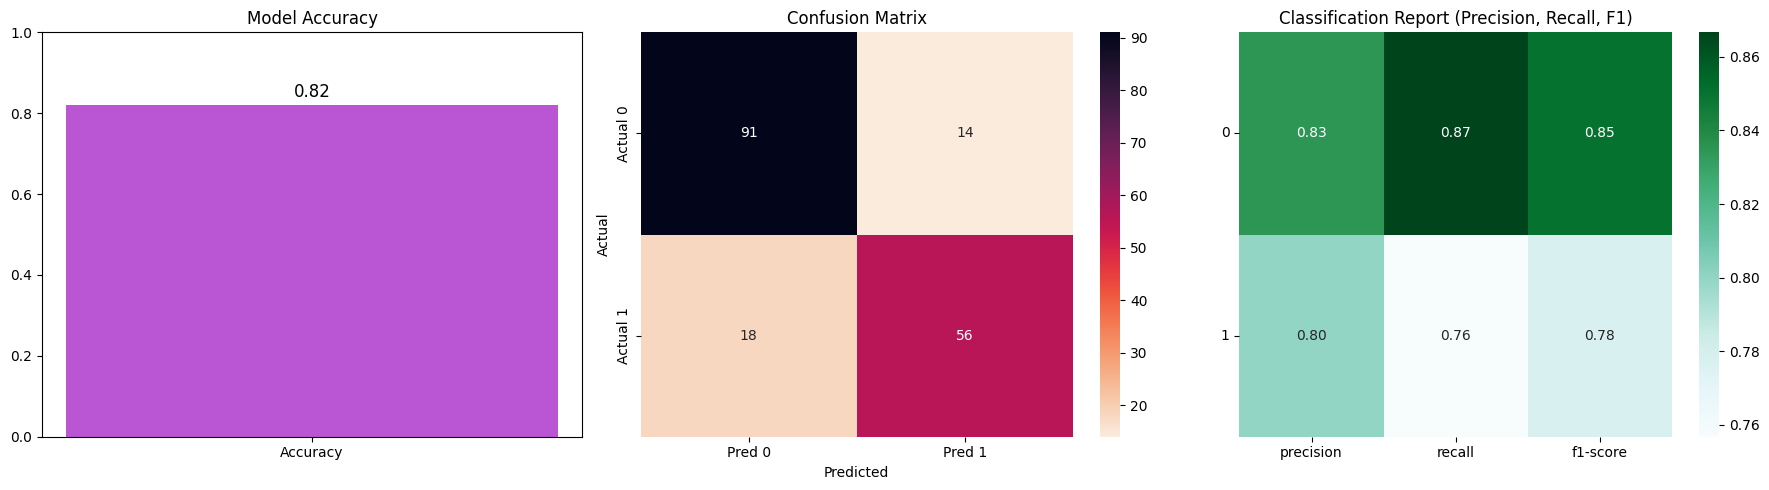

In [586]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, r2_score, mean_squared_error, mean_absolute_error,
    confusion_matrix, classification_report
)

# --- Preprocessing ---

# Separate numerical and categorical columns
numerical_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
x = df.drop("Survived", axis=1)
y = df['Survived']

# Scale numerical features
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model: Random Forest
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report_text = classification_report(y_test, y_pred)

# --- Display Metrics ---
print("\n📊 Evaluation Metrics:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", class_report_text)

# --- Visualizations ---
plt.figure(figsize=(18, 5))

# 1. Accuracy Score Bar Plot
plt.subplot(1, 3, 1)
plt.bar(["Accuracy"], [accuracy], color='mediumorchid')
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=12)

# 2. Confusion Matrix Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 3. Classification Report Heatmap
plt.subplot(1, 3, 3)
cr_df = pd.DataFrame(class_report_dict).transpose().iloc[:2, :-1]  # Only class 0 & 1 rows
sns.heatmap(cr_df, annot=True, cmap="BuGn", fmt=".2f")
plt.title("Classification Report (Precision, Recall, F1)")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


**Random Forest Classifier fro Important Features**


Feature Importances:
PassengerId: 0.106
Pclass: 0.064
Name: 0.113
Sex: 0.218
Age: 0.124
SibSp: 0.026
Parch: 0.023
Ticket: 0.108
Fare: 0.139
Cabin: 0.058
Embarked: 0.022

Selected important features (importance > 0.05): ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin']

Model Performance with Selected Features:
Accuracy Score: 0.8268
R² Score: 0.2858
Mean Squared Error (MSE): 0.1732
Root Mean Squared Error (RMSE): 0.4162
Mean Absolute Error (MAE): 0.1732

Confusion Matrix:
[[95 10]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



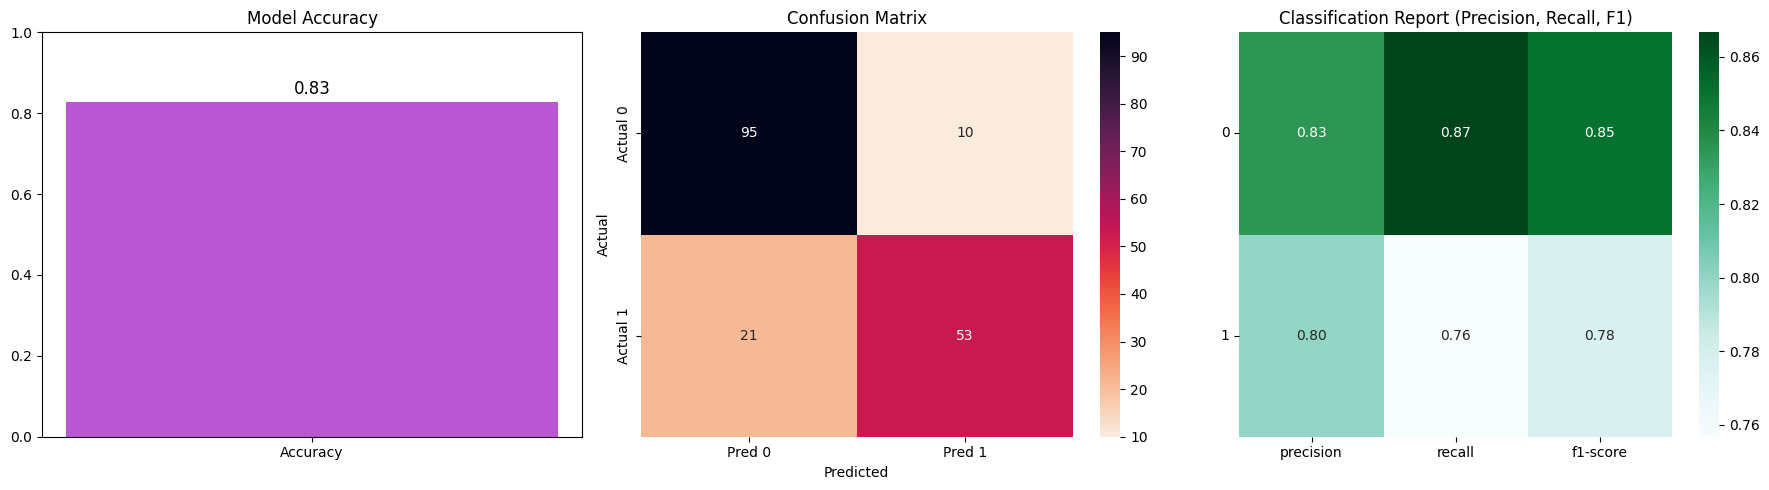

In [587]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Columns
numerical_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # ensure no NaNs or object issues

# Separate features and target
x = df.drop("Survived", axis=1)
y = df['Survived']

# Standardize only numerical features
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

# Step 1: Train full model to get feature importances
model = RandomForestClassifier()
model.fit(x, y)

# Step 2: Get and print feature importances
importances = model.feature_importances_
feature_names = x.columns

print("\nFeature Importances:")
important_features = []
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.3f}")
    if importance > 0.05:  # choose threshold (you can also pick top N)
        important_features.append(feature)

print(f"\nSelected important features (importance > 0.05): {important_features}")

# Step 3: Train/Test split with only important features
x_selected = x[important_features]
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

# Step 4: Train model with selected features
model_selected = RandomForestClassifier()
model_selected.fit(x_train, y_train)

# Step 5: Predictions & Metrics
y_pred = model_selected.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Step 6: Print metrics
print("\nModel Performance with Selected Features:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 8: Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# --- Visualizations ---
plt.figure(figsize=(18, 5))

# 1. Accuracy Score Bar Plot
plt.subplot(1, 3, 1)
plt.bar(["Accuracy"], [accuracy], color='mediumorchid')
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=12)

# 2. Confusion Matrix Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 3. Classification Report Heatmap
plt.subplot(1, 3, 3)
cr_df = pd.DataFrame(class_report_dict).transpose().iloc[:2, :-1]  # Only class 0 & 1 rows
sns.heatmap(cr_df, annot=True, cmap="BuGn", fmt=".2f")
plt.title("Classification Report (Precision, Recall, F1)")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


**Random Forest Classifier after Dimensionality Reduction**

Number of Principal Components Retained: 10

Confusion Matrix:
[[89 16]
 [18 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


🎯 Performance Metrics using PCA + Random Forest:
Accuracy Score: 0.8101
MSE: 0.1899
RMSE: 0.4358
R² Score: 0.2167


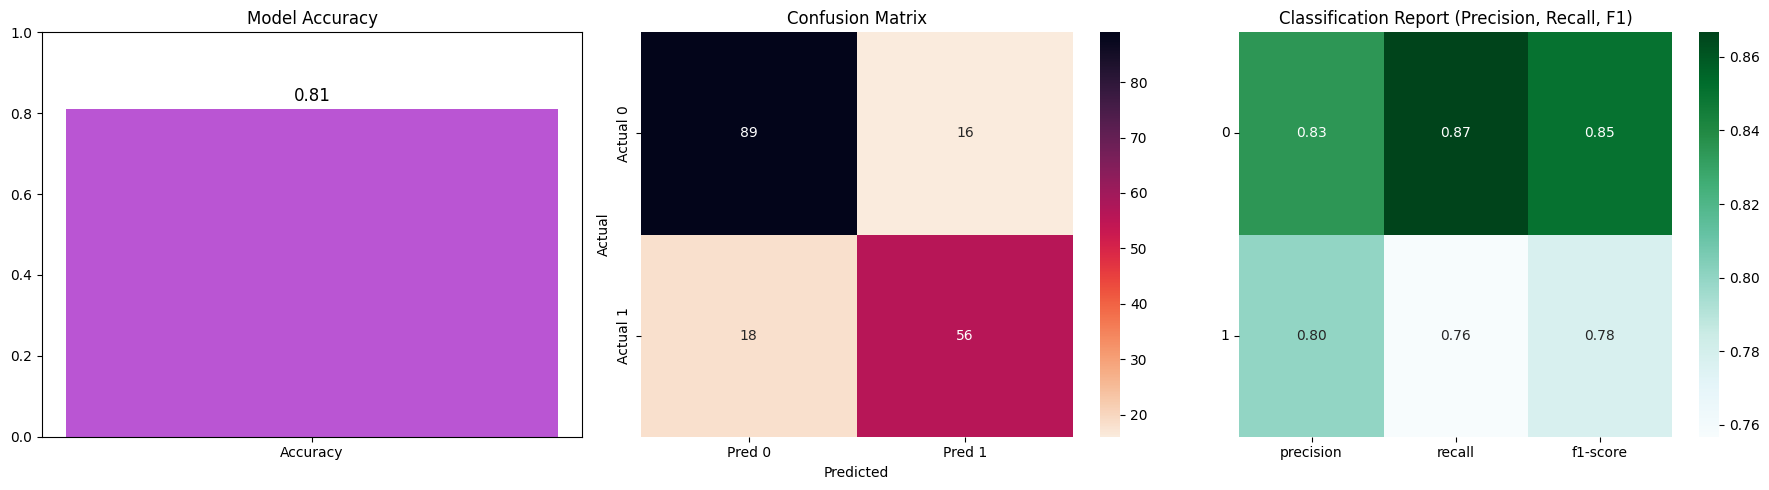

In [588]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score,confusion_matrix, classification_report
from sklearn.decomposition import PCA




# Define numerical and categorical columns
numerical_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
x = df.drop("Survived", axis=1)
y = df['Survived']

# Scale numerical features before PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA (retain 95% of variance or set fixed components)
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_scaled)

print(f"Number of Principal Components Retained: {x_pca.shape[1]}")


# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_pca, y)

from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Train on training set
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Predictions
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

print("\n🎯 Performance Metrics using PCA + Random Forest:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Visualizations ---
plt.figure(figsize=(18, 5))

# 1. Accuracy Score Bar Plot
plt.subplot(1, 3, 1)
plt.bar(["Accuracy"], [accuracy], color='mediumorchid')
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=12)

# 2. Confusion Matrix Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 3. Classification Report Heatmap
plt.subplot(1, 3, 3)
cr_df = pd.DataFrame(class_report_dict).transpose().iloc[:2, :-1]  # Only class 0 & 1 rows
sns.heatmap(cr_df, annot=True, cmap="BuGn", fmt=".2f")
plt.title("Classification Report (Precision, Recall, F1)")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Inference: Based on Non Linearity of Dataset and Performance of the Model - **Random Forest Classifier for Important Features**  is best

In [602]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Define columns
numerical_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
x = df.drop("Survived", axis=1)
y = df['Survived']

# Standardize numerical features
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

# Train full model to get feature importances
model = RandomForestClassifier()
model.fit(x, y)

# Get important features
importances = model.feature_importances_
feature_names = x.columns
important_features = [feature for feature, importance in zip(feature_names, importances) if importance > 0.01]

# Train model on selected important features
x_selected = x[important_features]
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2,stratify=y, random_state=42)

model_selected = RandomForestClassifier()
model_selected.fit(x_train, y_train)

# ------------------------
# Predict for a single row
# ------------------------

# Create one input row (example: adjust values as needed)
# Note: You must use the raw (unscaled) values first
# Add dummy values to match scaler's expected numerical columns
sample_input = pd.DataFrame([{
    'PassengerId': 1,
    'Pclass': 3,
    'Age': 22.0,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Sex': 0
}])

# Fill in missing important features with 0 (if any)
for col in important_features:
    if col not in sample_input.columns:
        sample_input[col] = 0

# Standardize only the numerical columns
sample_input[numerical_cols] = scaler.transform(sample_input[numerical_cols])

# Select only the important features for prediction
sample_input_selected = sample_input[important_features]

# Predict
predicted = model_selected.predict(sample_input_selected)
print("Prediction:", "Survived" if predicted[0] == 1 else "Did not survive")


Prediction: Survived
